<a href="https://colab.research.google.com/github/ugosamartins-commits/Sorbonne-M1-Analyse-Donnees-Portfolio-Ugo-Martins/blob/main/Seance_05_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== 1. THÉORIE DE L'ÉCHANTILLONNAGE (Intervalles de Fluctuation) ===
Proportions réelles (Population Mère) :
  - Pour : 0.3899
  - Contre : 0.4169
  - Sans opinion : 0.1931
Fichier chargé : ./data/Echantillonnage-100-Echantillons.csv (Taille : (100, 3))

Effectif moyen d'un échantillon (n) : 1000.0
Fréquences observées (moyenne des 100 échantillons) :
Pour            0.391
Contre          0.416
Sans opinion    0.193
dtype: float64

Comparaison avec l'Intervalle de Fluctuation (95%) :
  [Pour] p_réelle=0.390 | IF=[0.360; 0.420] | f_obs=0.391 -> Dedans ? OUI
  [Contre] p_réelle=0.417 | IF=[0.386; 0.447] | f_obs=0.416 -> Dedans ? OUI
  [Sans opinion] p_réelle=0.193 | IF=[0.169; 0.218] | f_obs=0.193 -> Dedans ? OUI

=== 2. THÉORIE DE L'ESTIMATION (Intervalles de Confiance) ===
Analyse du 1er échantillon (Taille n=1000) :
Valeurs brutes : {'Pour': 395, 'Contre': 396, 'Sans opinion': 209}
  [Pour] f_est=0.395 | IC 95%=[0.365; 0.425] | Contient p_réelle (0.390) ? OUI
  [Contre] f_est=0.396 |

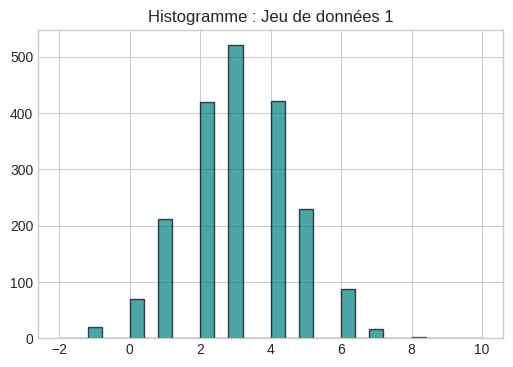


Test de Shapiro-Wilk sur Jeu de données 2 :
  - P-value : 0.00000
  => Conclusion : On REJETTE H0. La distribution n'est PAS normale.


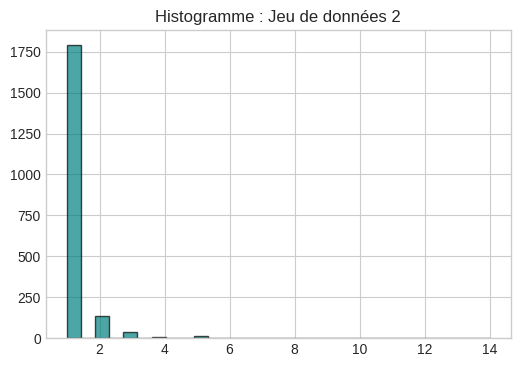

In [2]:
#coding:utf8
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Configuration esthétique des graphiques
plt.style.use('seaborn-v0_8-whitegrid')

# --- FONCTIONS UTILITAIRES ---
def ouvrirUnFichier(chemin):
    """Charge un fichier CSV dans un DataFrame Pandas."""
    try:
        df = pd.read_csv(chemin)
        print(f"Fichier chargé : {chemin} (Taille : {df.shape})")
        return df
    except FileNotFoundError:
        print(f"ERREUR : Le fichier {chemin} est introuvable.")
        return None

def intervalle_fluctuation_95(p, n):
    """Calcule l'intervalle de fluctuation asymptotique à 95%."""
    # Condition de validité (n >= 30, np >= 5, n(1-p) >= 5)
    z = 1.96
    borne_inf = p - z * np.sqrt((p * (1 - p)) / n)
    borne_sup = p + z * np.sqrt((p * (1 - p)) / n)
    return borne_inf, borne_sup

def intervalle_confiance_proportion(f, n):
    """Calcule l'intervalle de confiance d'une proportion à 95%."""
    z = 1.96
    marge = z * np.sqrt((f * (1 - f)) / n)
    return f - marge, f + marge

# ==============================================================================
# 1. THÉORIE DE L'ÉCHANTILLONNAGE
# ==============================================================================
print("\n=== 1. THÉORIE DE L'ÉCHANTILLONNAGE (Intervalles de Fluctuation) ===")

# Données de la population mère (énoncé)
pop_totale = 2185
pop_pour = 852
pop_contre = 911
pop_sans_avis = 422

# Calcul des proportions réelles (p)
p_reelle = {
    "Pour": pop_pour / pop_totale,
    "Contre": pop_contre / pop_totale,
    "Sans opinion": pop_sans_avis / pop_totale # Changed 'Sans_opinion' to 'Sans opinion'
}

print("Proportions réelles (Population Mère) :")
for k, v in p_reelle.items():
    print(f"  - {k} : {v:.4f}")

# Chargement des échantillons simulés
df_echantillons = ouvrirUnFichier("./data/Echantillonnage-100-Echantillons.csv")

if df_echantillons is not None:
    # Calcul de la moyenne de chaque colonne (arrondi à l'entier le plus proche)
    moyennes_echantillons = df_echantillons.mean().round(0)

    # Calcul de l'effectif moyen total d'un échantillon (somme des moyennes)
    n_moyen = moyennes_echantillons.sum()

    # Calcul des fréquences observées (moyenne des échantillons)
    freq_observees = moyennes_echantillons / n_moyen

    print(f"\nEffectif moyen d'un échantillon (n) : {n_moyen}")
    print("Fréquences observées (moyenne des 100 échantillons) :")
    print(freq_observees)

    # Calcul des intervalles de fluctuation pour chaque catégorie
    print("\nComparaison avec l'Intervalle de Fluctuation (95%) :")
    for col in df_echantillons.columns:
        p_theo = p_reelle[col] # La proportion vraie
        inf, sup = intervalle_fluctuation_95(p_theo, n_moyen)
        f_obs = freq_observees[col]

        dans_intervalle = "OUI" if inf <= f_obs <= sup else "NON"
        print(f"  [{col}] p_réelle={p_theo:.3f} | IF=[{inf:.3f}; {sup:.3f}] | f_obs={f_obs:.3f} -> Dedans ? {dans_intervalle}")

# ==============================================================================
# 2. THÉORIE DE L'ESTIMATION
# ==============================================================================
print("\n=== 2. THÉORIE DE L'ESTIMATION (Intervalles de Confiance) ===")

if df_echantillons is not None:
    # On prend le PREMIER échantillon (ligne 0)
    echantillon_1 = df_echantillons.iloc[0]
    n_echantillon_1 = echantillon_1.sum() # Taille de cet échantillon

    print(f"Analyse du 1er échantillon (Taille n={n_echantillon_1}) :")
    print(f"Valeurs brutes : {echantillon_1.to_dict()}")

    # Calcul des fréquences et des intervalles de confiance
    for col in df_echantillons.columns:
        f_estimee = echantillon_1[col] / n_echantillon_1
        conf_inf, conf_sup = intervalle_confiance_proportion(f_estimee, n_echantillon_1)

        # On vérifie si la vraie proportion (p_reelle) est dans cet intervalle
        p_vraie = p_reelle[col]
        succes = "OUI" if conf_inf <= p_vraie <= conf_sup else "NON"

        print(f"  [{col}] f_est={f_estimee:.3f} | IC 95%=[{conf_inf:.3f}; {conf_sup:.3f}] | Contient p_réelle ({p_vraie:.3f}) ? {succes}")

# ==============================================================================
# 3. THÉORIE DE LA DÉCISION (Tests Statistiques)
# ==============================================================================
print("\n=== 3. THÉORIE DE LA DÉCISION (Tests de Normalité) ===")

# Chargement des fichiers de test
df_test1 = ouvrirUnFichier("./data/Loi-normale-Test-1.csv")
df_test2 = ouvrirUnFichier("./data/Loi-normale-Test-2.csv")

def test_normalite(data, nom_dataset):
    """Effectue un test de Shapiro-Wilk et affiche le résultat."""
    if data is None: return

    # Le test de Shapiro s'attend à une série 1D (on prend la 1ère colonne)
    serie = data.iloc[:, 0]
    stat, p_value = stats.shapiro(serie)

    alpha = 0.05
    print(f"\nTest de Shapiro-Wilk sur {nom_dataset} :")
    print(f"  - P-value : {p_value:.5f}")

    if p_value > alpha:
        print("  => Conclusion : On NE PEUT PAS rejeter H0. La distribution semble NORMALE.")
    else:
        print("  => Conclusion : On REJETTE H0. La distribution n'est PAS normale.")

    # Petit histogramme pour vérifier visuellement (Bonus visuel)
    plt.figure(figsize=(6, 4))
    plt.hist(serie, bins=30, alpha=0.7, color='teal', edgecolor='black')
    plt.title(f"Histogramme : {nom_dataset}")
    plt.show()

test_normalite(df_test1, "Jeu de données 1")
test_normalite(df_test2, "Jeu de données 2")

# ==============================================================================
# 4. BONUS : Identification de la loi inconnue
# ==============================================================================
# Astuce : Regarde la forme de l'histogramme du jeu de données qui n'est pas normal.
# S'il est plat = Uniforme. S'il décroît exponentiellement = Exponentielle.